<a href="https://colab.research.google.com/github/pranavpathak08/MLalgos/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implemeting Linear Regression 
## Importing necessary libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Generating Training Data

In [65]:
rng = np.random.default_rng(seed = 101)
X_train = (np.arange(-2, 2, 0.01).reshape(1, -1))
y_train = (2*X_train**3 + 3*X_train**2 + 4 + rng.normal(0, 1, X_train.shape[1]).reshape(1, -1)).T ## Noise has been added which has normal distribution

In [4]:
X_train.shape, y_train.shape

((1, 400), (400, 1))

### Visualising training data

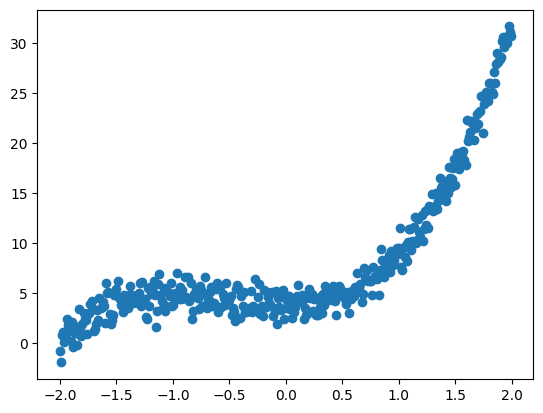

In [66]:
plt.scatter(X_train, y_train)

## Generating Test Data

In [67]:
rng = np.random.default_rng(seed = 102)
X_test = np.arange(-2, 2, 0.02).reshape(1, -1)
y_test = (2*X_test**3+3*X_test**2 +4 + rng.normal(0, 2, X_test.shape[1]).reshape(1, -1)).T

In [7]:
X_test.shape, y_test.shape

((1, 200), (200, 1))

## Adding dummy feature
* we know that the best fit will not pass through the origin every time, for this problem we add a dummy feature to the dataset. This dummy feature is arrays of ones.

In [68]:
dummy_feature = np.ones(X_train.shape[1])
X = np.row_stack((dummy_feature, X_train))
X_t = np.row_stack((np.ones(X_test.shape[1]), X_test))

In [9]:
X.shape

(2, 400)

## Finding weight vector and prediction for training and test dataset

In [69]:
## When we optimise the loss function we get w = (XX')^-1.Xy   ~ X' here means X transpose
def weights(X, y):
  return (np.linalg.pinv(X@(X.T)))@X@y

In [70]:
## Finding weight vector
w = weights(X, y_train)
w.shape

(2, 1)

In [71]:
## Prediction
def predict(X, w):
  return (X.T)@w

In [72]:
train_pred = predict(X, w)
test_pred = predict(X_t, w)

## Plotting the weight vector

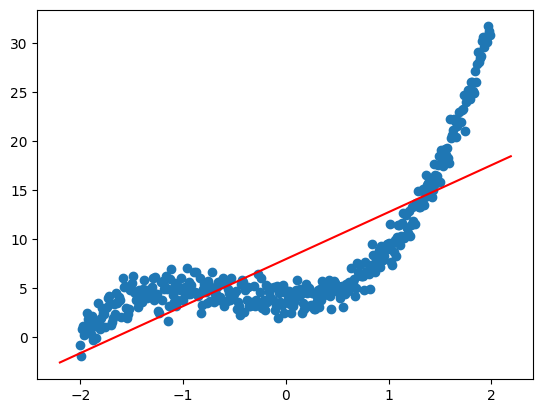

In [73]:
plt.scatter(X_train, y_train)
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = w[0] + w[1]*x_vals
plt.plot(x_vals, y_vals, 'r-')

## Evaluating RMSE (Root mean squared error)

In [74]:
## RMSE
def loss(y, yhat):
  return np.sqrt(np.mean((y - yhat)** 2))

In [75]:
## Training error
loss_train = loss(y_train, train_pred)
loss_test = loss(y_test, test_pred)
loss_train, loss_test


(4.477002001803876, 4.718639896481515)

## Linear Regression using Gradient Descent

In [76]:
## We find gradient of the loss function. We start with a random w at the loss function.
def gradient(X, w, y):
  return (X@X.T)@w - (X@y)

In [81]:
## Gradient descent. This is an update rule (w = w - eta*gradient()) ~ [eta is the learning rate here. Size of eta determines how quickly we converge or diverge from min val]
def gd(X, y, n_iter, eta):
  w0 = np.zeros(X.shape[0]).reshape(2, 1)
  for i in range(n_iter):
    w0 = w0 - eta*(gradient(X, w0, y))

  return w0

## Weight vector calculated using gradient descent

In [89]:
w_gd = gd(X, y_train, 100, 0.0001)
w_gd

array([[7.80494706],
       [4.77759074]])

In [90]:
train_pred_gd =  predict(X, w_gd)
loss(y_train, train_pred_gd)

4.479099000218296

## Plot of number of iterations vs loss


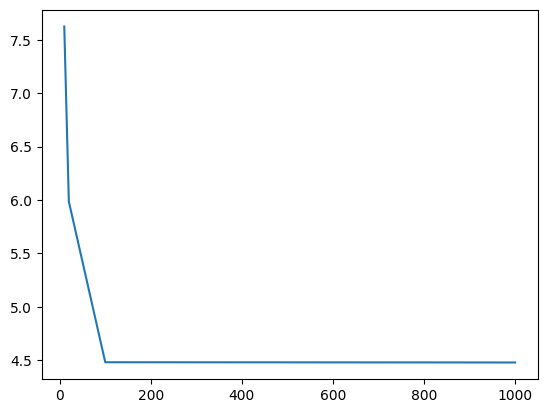

In [91]:
niters = [10, 20, 100, 1000]
lss = []
for i in niters:
  w_gd = gd(X, y_train, i, 0.0001)
  pred = predict(X, w_gd)
  lss.append(loss(y_train, pred))

plt.plot(niters, lss)